Prompt: Write a function to find the minimum number of connections (one-way flights) to add that you allow as an airline to enable any passenger to go from LGA to any other airport. They don't have to go directly from LGA to their destination airport. Answer is 3 
Source: https://www.youtube.com/watch?v=qz9tKlF431k

I will be using Python here and not creating the mapping of airports to unique integer IDs instead i will just be using dictionaries throughout since it is much easier to create dictionary mapping in Python than C++, and use various functions on it.

Notes: 
We are looking at an Acyclic A-directed graph. The reason it has to be acyclic is because if say there is a cycle betwween different areas then they all need to be compressed to one super-connected area. We need to make sure that from our starting airport, all the nodes are connected. If there are aiports with no incoming routes from starting point or anywhere (that is indegree = 0, outdegree is number of outgoing routes), that is essentially the answer to the connections that we need to add.

Adjacency list: It is representation of graph as an array of lists of lists

Algorithm implemented: Kosaraju's algorith to find Super Connected Components SCC. More on that here: http://www.kylesauri.com/home/kosarajus-algorithm-in-python-3 Though in my opinion, William Lin in the original youtube video explained it better than any of these long descriptions.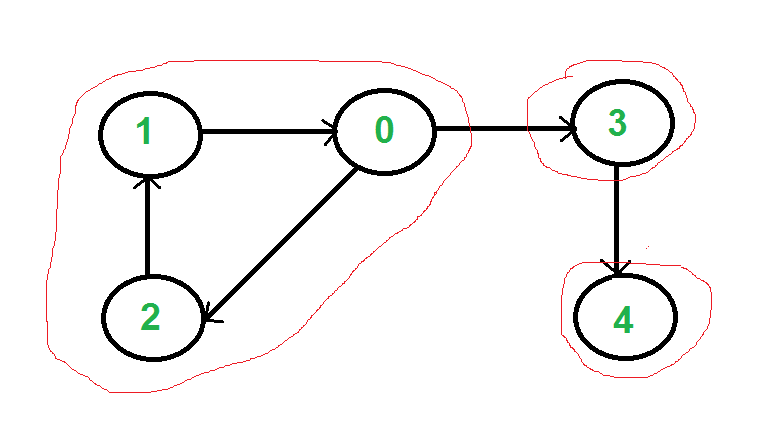 Hereby shown SCC's marked for a random diagram from GeeksForGeeks https://www.geeksforgeeks.org/strongly-connected-components/



In [1]:
#input values
airports = [
    "BGI","CDG","DEL","DOH","DSM","EWR","EYW","HND","ICN",
    "JFK","LGA","LHR","ORD","SAN","SFO","SIN","TLV","BUD"
]

routes =[
    ["DSM","ORD"],
    ["ORD","BGI"],
    ["BGI","LGA"],
    ["SIN","CDG"],
    ["CDG","SIN"],
    ["CDG","BUD"],
    ["DEL","DOH"],
    ["DEL","CDG"],
    ["TLV","DEL"],
    ["EWR","HND"],
    ["HND","ICN"],
    ["HND","JFK"],
    ["ICN","JFK"],
    ["JFK","LGA"],
    ["EYW","LHR"],
    ["LHR","SFO"],
    ["SFO","SAN"],
    ["SFO","DSM"],
    ["SAN","EYW"]
]

startingAirport = "LGA"

In [104]:
from collections import defaultdict

In [220]:
def minimumNumberOfConnections(airports,routes,startingAirport):
    #process input
    airport_list = []
    for airport in airports:
        airport_list.append(airport)
        
    # Adjacency list: iterating over list of tuples 
    airport_graph = defaultdict(list) 
    for key, val in routes: 
        airport_graph[key].append(val) 

    #find strongly connected components  
    #reverse Adjacency list
    rev_airport_graph = defaultdict(list) 
    for key, val in routes: 
        rev_airport_graph[val].append(key) 
      
    #dfs traversal
    stack = []
    visited = set()
    
    def dfs1(node):
        visited.add(node)
        for connection in airport_graph[node]:
            if connection not in visited:
                dfs1(connection)
        stack.append(node)
            
    for i in airport_list:
        if i not in visited:
            dfs1(i)
            
   #compress the graph based on components    
    visited2 = set()
    who = dict() #Arbitrarily selected representative nodes of 
                 #super connected components
    
    def dfs2(node, rep):
        visited2.add(node)
        who[node] = rep
        for connection in rev_airport_graph[node]:
            if connection not in visited2:
                dfs2(connection, rep)
            
    while len(stack) != 0:
        u = stack[-1]
        stack.pop()
        if u not in visited2:
            dfs2(u, u)
    
    #find number of nodes with indegree = 0 which are not the starting point in the new graph
    indegree = defaultdict(lambda: 0)
    for i in airport_list:
        for j in airport_graph[i]:
            if(who[i]!=who[j]):    
                indegree[j] +=1    
    """
    checking they both are in different components.
    This will give indegrees of all the nodes in the new condensed graph
    """
                  
                
    ans = []
    for i in airport_list:
        if(who[i]==i and indegree[i]==0 and i != startingAirport):
            ans.append(i)
        #we are doing who[i] because only need to go through representative nodes of the condensed graphs
        
    return ans


In [221]:
x = minimumNumberOfConnections(airports,routes,startingAirport)
x

['EWR', 'EYW', 'TLV']